In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import SelectKBest, f_regression

#auxiliary
import auxilary

#Feature selection with RandomForest
from sklearn.ensemble import RandomForestClassifier

#SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [15]:
# Import Training Set

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv(r"y_train.csv")

display('X_train:', X_train.shape, X_train.head())
display('y_train:', y_train.shape, y_train.head())

'X_train:'

(1212, 833)

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,0.0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,1.0,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763
2,2.0,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN
3,3.0,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,4.0,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,...,10.397777,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136


'y_train:'

(1212, 2)

,id,y
0,0.0,75.0
1,1.0,53.0
2,2.0,78.0
3,3.0,65.0
4,4.0,86.0


In [16]:
# Drop id column for X_train and y_train

X_train = X_train.drop(columns='id', axis=1)
display("X_train.head():", X_train.head())
print("X_train.shape:", X_train.shape)

print(" ")

y_train = y_train.drop(columns='id', axis=1)
display("y_train.head():", y_train.head())
print("y_train.shape:", y_train.shape)

'X_train.head():'

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136


X_train.shape: (1212, 832)
 


'y_train.head():'

,y
0,75.0
1,53.0
2,78.0
3,65.0
4,86.0


y_train.shape: (1212, 1)


### FILL IN NaNs

In [17]:
# Fill in data with mean

X_train.fillna(np.nanmean(X_train), inplace=True)
display(X_train.head())

# and look at NaNs

display("Total Number of NaN in X_train:", X_train.isna().sum(axis=1).sum(axis=0))
print(" ")
print("X_train.shape:", X_train.shape)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,1.183454e+05,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,1.024507e+01,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,1.086146e+01,1.075484e+05,2.299202e+00
1,-2.848199e+17,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,1.008802e+01,988.135968,999.044639,105238.779040,106365.468525,10334.091649,-2.848199e+17,1.078412e+05,2.472763e+00
2,9.537302e+04,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,1.051423e+01,995.480813,898.329758,107044.005199,102704.104686,7697.875887,1.027776e+01,1.034146e+05,-2.848199e+17
3,1.050663e+05,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,1.099186e+01,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688e+00,1.057229e+05,2.484935e+00
4,9.895703e+04,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,-2.848199e+17,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,1.219638e+01,-2.848199e+17,1.930136e+00


'Total Number of NaN in X_train:'

0

 
X_train.shape: (1212, 832)


### OUTLIER DETECTION

In [18]:
# Outlier detection via Euclidean distance

# Calculate mean distance to 10 nearest neighbors

#neigh = NearestNeighbors(n_neighbors=10)
#neigh.fit(X_train)

#mean_dist_10NN_vec, indices = neigh.kneighbors(X_train, return_distance=True)
#print("mean_dist_10NN_vec.shape:", mean_dist_10NN_vec.shape)

#mean_dist_10NN_dp = mean_dist_10NN_vec.mean(axis=1)
#print("mean_dist_10NN_dp:", mean_dist_10NN_dp)


#factor = 1.5
#mean_dist_tot = mean_dist_10NN_vec.mean()
#threshold = factor * mean_dist_tot
#print("threshold:", threshold)

# find indices to be removed

#index_to_be_removed = mean_dist_10NN_dp > threshold
#print("Number of indices to be removed:", index_to_be_removed.sum())

# Remove indices of the dataset

#display("X_train.shape:", X_train.shape)

# Transform X_train to numpy array
#X_train = X_train.to_numpy()
#display(X_train)

# Transform y_train to numpy array
#y_train = y_train.to_numpy()

# Delete indices 
#X_train = np.delete(X_train, np.where(index_to_be_removed), axis=0)

#y_train = np.delete(y_train, np.where(index_to_be_removed), axis=0)
#print("And also drop respective datapoints in y_train", y_train.shape[0])

# Transform both X_train and y_train back to DataFrames

#X_train = pd.DataFrame(X_train)
#y_train = pd.DataFrame(y_train)

#print("X_train.shape:", X_train.shape)
#print("y_train.shape:", y_train.shape)

Note: change either KNN (number of neighbors) or factor // alternative: through a certain percentage of data with biggest avg distance

In [19]:
# Outlier detection via IsolationForest

X_train, y_train = auxilary.OutlierDetectionIsolationForest(X_train, y_train, percentageOutlier = 'auto')
print("Shape after outlier detection: ", X_train.shape)

Number Of Outliers: 0
Shape after outlier detection:  (1212, 832)


### FEATURE SELECTION

/Users/pedro.roig.aparicio@ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pedro.roig.aparicio@ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


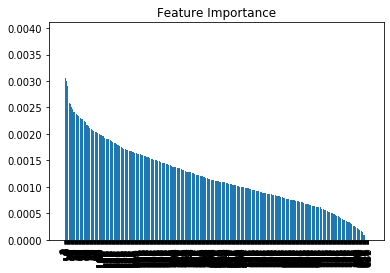

In [20]:
# Select best features
random_Forest = RandomForestClassifier(random_state=0, n_jobs=-1)
model = random_Forest.fit(X_train, y_train)

# print diagram of feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.show()

In [21]:
# -> PROVISIONAL MANUALLY; THIS WILL BE DEFINED BY ITERATING
inputDim = 150

featureSelection = SelectKBest(f_regression, k = inputDim)
X_train = featureSelection.fit_transform(X_train, y_train)

print("Shape after feature selection: ", X_train.shape)

Shape after feature selection:  (1212, 150)


/Users/pedro.roig.aparicio@ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### TRAIN-TEST-SPLIT

In [22]:
# Split in Training & Test for Cross validation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=4)

In [23]:
# Inspect current X_train and X_test

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_val.shape)

X_train.shape: (1090, 150)
X_test.shape: (122, 150)


### STANDARDIZE

In [24]:
total_mean_non_standardized = X_train.mean().mean()
display("This is the mean of the non-standardized dataset:", total_mean_non_standardized)

# Standardize

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
print("Mean X_train after standardized:", X_train.mean(axis=0).mean(axis=0))

y_train = y_train.values.ravel()

'This is the mean of the non-standardized dataset:'

-1.482501623397296e+18

Mean X_train after standardized: 3.8271768527012684e-16


### SVR

In [25]:
# Do SVR with Gaussian Kernel
# First try

regressor = SVR(kernel='rbf',gamma='scale')
regressor.fit(X_train,y_train)

y_pred_try1=regressor.predict(X_val)

print("Regressor score:", regressor.score(X_val, y_val))
from sklearn.metrics import r2_score
print("r_2 score:", r2_score(y_val,y_pred_try1))

Regressor score: -0.039281439899504944
r_2 score: -0.039281439899504944


In [26]:
# Improve parameters with GridSearchCV
    
parameters = {'C':[1, 10, 100, 1000]}
svr = SVR(kernel='rbf', gamma="scale")
clf = GridSearchCV(svr, parameters, cv=10)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

y_pred = clf.predict(X_val)
print("r^2 score:", r2_score(y_val,y_pred))

Best parameters set found on development set:

{'C': 10}

r^2 score: -0.03164237970553119


### FINAL SUBMISSION